In [1]:
import pandas as pd
import NaiveDE
import SpatialDE
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Set data path
data_path = "D:/Desktop/MGI/CODE/Data/"

In [3]:
data = sc.read_h5ad(data_path + "SS200000116BR_E6.bin200.h5ad")
data

# orig.ident: original identifier
# x, y: spatial location

AnnData object with n_obs × n_vars = 17574 × 30523
    obs: 'orig.ident', 'x', 'y'
    obsm: 'spatial'

In [4]:
print(data.to_df().head(5))

                AL354822.1  AC233755.2  AC007325.2  AC011841.1  MAFIP  \
27487790701800         3.0         0.0         0.0         0.0    0.0   
29205777624400         2.0         0.0         0.0         0.0    0.0   
31782757998200         1.0         0.0         0.0         0.0    0.0   
32641751459800         1.0         0.0         0.0         0.0    0.0   
39513699138800         1.0         0.0         0.0         0.0    0.0   

                BX004987.1  AC136616.1  AC136612.1  TTTY3B  DAZ2  ...  AEBP1  \
27487790701800         0.0         0.0         0.0     0.0   0.0  ...    3.0   
29205777624400         0.0         0.0         0.0     0.0   0.0  ...    0.0   
31782757998200         0.0         0.0         0.0     0.0   0.0  ...    3.0   
32641751459800         0.0         0.0         0.0     0.0   0.0  ...    3.0   
39513699138800         0.0         0.0         0.0     0.0   0.0  ...   17.0   

                KLHL8  AC237221.1  AC006455.1  SELENOI  HABP2  SEC61G  \
2748779

In [5]:
data_df = data.to_df()
colsum = data_df.sum(axis = 1)
data_df['total_counts'] = colsum

In [6]:
data_df['total_counts']

27487790701800     5204.0
29205777624400     9076.0
31782757998200    15168.0
32641751459800    12591.0
39513699138800    92837.0
                   ...   
66142496363200        1.0
16320875726800        1.0
22333829953400        2.0
42090679502000        1.0
94489280513600        1.0
Name: total_counts, Length: 17574, dtype: float64

In [7]:
# observation annotation
print("Observation annotation:")
print(data.obs.head())  # 打印前几行观测值的注释信息

# variable annotation
print("\nVariable annotation:")
print(data.var.head())  # 打印前几行变量的注释信息

# 查看附加的观测值数据
print("\nAdditional observation data:")
print(data.obsm) 

# Data shape
print("\nData shape:")
print("Number of observations:", data.shape[0])
print("Number of variables:", data.shape[1])

Observation annotation:
               orig.ident     x      y
27487790701800     sample  6400   7400
29205777624400     sample  6800  11600
31782757998200     sample  7400   7800
32641751459800     sample  7600  10200
39513699138800     sample  9200  15600

Variable annotation:
Empty DataFrame
Columns: []
Index: [AL354822.1, AC233755.2, AC007325.2, AC011841.1, MAFIP]

Additional observation data:
AxisArrays with keys: spatial

Data shape:
Number of observations: 17574
Number of variables: 30523


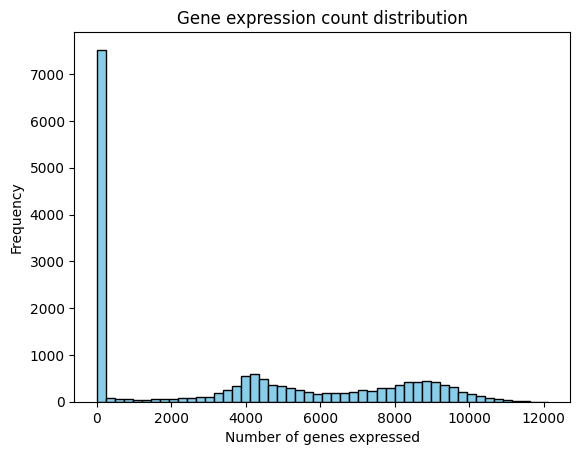

In [8]:
sc.pp.calculate_qc_metrics(data, inplace=True)    

plt.hist(data.obs['n_genes_by_counts'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Number of genes expressed')
plt.ylabel('Frequency')
plt.title('Gene expression count distribution')
plt.show()

In [9]:
# pre-processing
sc.pp.filter_cells(data, min_genes = 500)  # filter低于200个genes的细胞
sc.pp.filter_cells(data, max_genes = 10000)
sc.pp.filter_genes(data, min_cells = 3) # filter在少于3个细胞中表达的genes
print(data.shape) # shape

(9511, 28642)


In [10]:
# normalize
# target_sum: 每个样本的目标总表达量，归一化为1e4
sc.pp.normalize_total(data, target_sum=1e4)
print(data.to_df().iloc[:5, :5])

                AL354822.1  AC233755.2  AC007325.2  AC011841.1  MAFIP
27487790701800    5.764796         0.0         0.0         0.0    0.0
29205777624400    2.203614         0.0         0.0         0.0    0.0
31782757998200    0.659283         0.0         0.0         0.0    0.0
32641751459800    0.794218         0.0         0.0         0.0    0.0
43808666430600    1.204771         0.0         0.0         0.0    0.0


In [11]:
# 高变基因
sc.pp.log1p(data)
var_genes = sc.pp.highly_variable_genes(data, min_mean=0.0125, max_mean=3, min_disp=0.25, inplace = False)
var_genes

,means,dispersions,mean_bin,dispersions_norm,highly_variable
AL354822.1,0.002292,0.837982,"(-0.00587, 0.295]",2.268247,False
AC233755.2,0.001113,-0.719513,"(-0.00587, 0.295]",-1.305484,False
AC007325.2,0.002085,-0.499278,"(-0.00587, 0.295]",-0.800146,False
AC011841.1,0.000661,-0.210644,"(-0.00587, 0.295]",-0.137864,False
MAFIP,0.002230,-0.864183,"(-0.00587, 0.295]",-1.637434,False
...,...,...,...,...,...
HABP2,1.262223,0.161617,"(1.181, 1.476]",-0.296862,False
SEC61G,1.203872,0.473637,"(1.181, 1.476]",0.619721,True
HSP90B1,2.275818,0.392140,"(2.066, 2.361]",-0.413873,False
IGFBP1,2.674083,0.838038,"(2.656, 2.951]",-0.103387,False


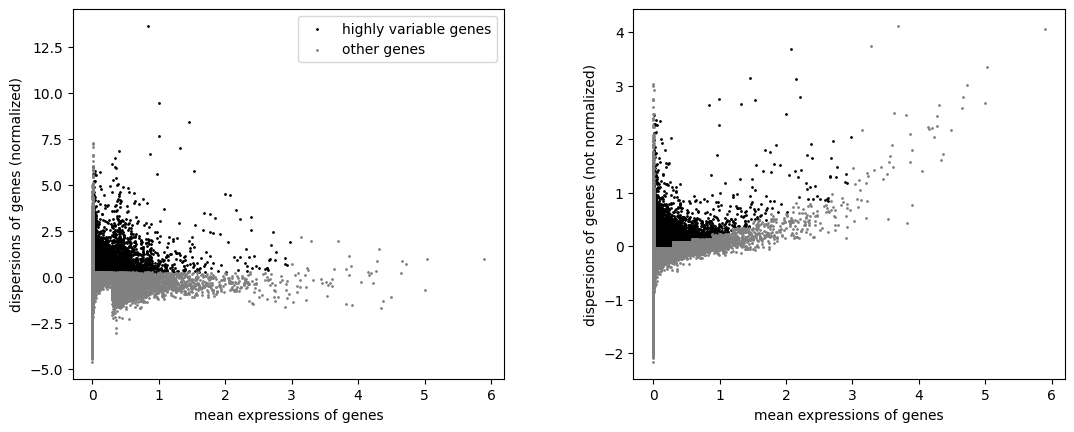

In [12]:
sc.pl.highly_variable_genes(var_genes)

In [13]:
# Get highly variable genes
hv_genes = var_genes[var_genes["highly_variable"] == True].index
print(hv_genes)

# Get the index of highly variable genes
hv_genes_index = np.where(var_genes["highly_variable"])[0]
print("\n", hv_genes_index)

Index(['AC004556.1', 'HBV_P', 'NLGN4Y', 'TMLHE-AS1', 'TMLHE', 'USP9Y', 'MTCP1',
       'BRCC3', 'HBV_preC_C', 'DDX3Y',
       ...
       'CBR3', 'OGDH', 'CCM2', 'TBRG4', 'CHRM5', 'LANCL2', 'PSPH', 'AEBP1',
       'KLHL8', 'SEC61G'],
      dtype='object', length=6982)

 [    7    13    19 ... 28633 28634 28638]


In [14]:
data = data[data.obs_names, data.var_names[hv_genes_index]]

In [15]:
# name of highly variable genes
data.var_names

Index(['AC004556.1', 'HBV_P', 'NLGN4Y', 'TMLHE-AS1', 'TMLHE', 'USP9Y', 'MTCP1',
       'BRCC3', 'HBV_preC_C', 'DDX3Y',
       ...
       'CBR3', 'OGDH', 'CCM2', 'TBRG4', 'CHRM5', 'LANCL2', 'PSPH', 'AEBP1',
       'KLHL8', 'SEC61G'],
      dtype='object', length=6982)

In [16]:
counts = data.to_df()
counts

,AC004556.1,HBV_P,NLGN4Y,TMLHE-AS1,TMLHE,USP9Y,MTCP1,BRCC3,HBV_preC_C,DDX3Y,...,CBR3,OGDH,CCM2,TBRG4,CHRM5,LANCL2,PSPH,AEBP1,KLHL8,SEC61G
27487790701800,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,1.072131,0.000000,0.0,0.0,1.072131,1.911732,0.0,1.577575
29205777624400,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.742797,0.742797,...,0.0,0.742797,0.000000,0.742797,0.0,0.0,0.000000,0.000000,0.0,1.873191
31782757998200,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.506385,...,0.0,0.000000,1.725438,0.840949,0.0,0.0,0.506385,1.091201,0.0,1.457781
32641751459800,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.951054,0.000000,0.0,0.0,0.000000,1.218661,0.0,0.951054
43808666430600,0.0,0.0,0.0,0.0,0.0,0.957955,0.0,0.0,0.790624,0.337608,...,0.0,0.337608,0.957955,0.337608,0.0,0.0,0.337608,1.101259,0.0,1.761143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46385646822400,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
61847529076600,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
103079215109600,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,2.549943,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
25769803789200,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,2.360564,0.0,3.005378


In [17]:
coords = data.obs[['x', 'y', 'total_counts']]
coords

,x,y,total_counts
27487790701800,6400,7400,5204.0
29205777624400,6800,11600,9076.0
31782757998200,7400,7800,15168.0
32641751459800,7600,10200,12591.0
43808666430600,10200,11400,24901.0
...,...,...,...
46385646822400,10800,25600,817.0
61847529076600,14400,14200,1799.0
103079215109600,24000,5600,847.0
25769803789200,6000,13200,1042.0


Text(0, 0.5, 'Frequency')

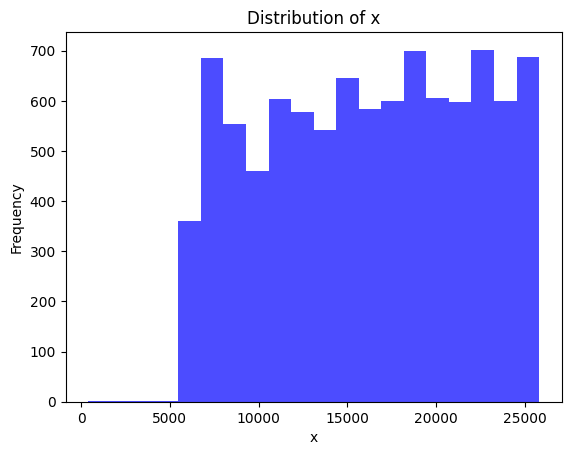

In [18]:
plt.hist(coords['x'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of x')
plt.xlabel('x')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

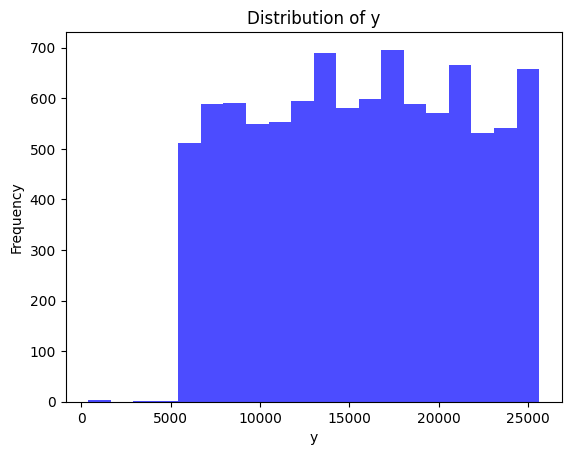

In [19]:
plt.hist(coords['y'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of y')
plt.xlabel('y')
plt.ylabel('Frequency')

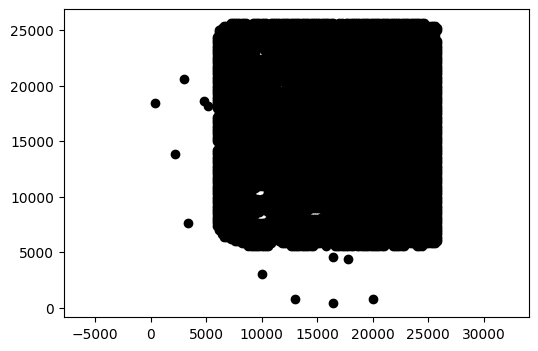

In [20]:
plt.figure(figsize = (6, 4))
plt.scatter(coords['x'], coords['y'], c='k');
plt.axis('equal');

In [21]:
norm_expr = NaiveDE.stabilize(counts.T).T

c:\Users\40868\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [22]:
resid_expr = NaiveDE.regress_out(coords, norm_expr.T, 'np.log(total_counts)').T

In [23]:
X = coords[['x','y']].to_numpy()
sample_resid_expr = resid_expr.sample(n=1000, axis=1, random_state=1)

In [25]:
results = SpatialDE.run(X, sample_resid_expr)

KeyboardInterrupt: 

In [ ]:
X

array([[ 6400,  7400],
       [ 6800, 11600],
       [ 7400,  7800],
       ...,
       [24000,  5600],
       [ 6000, 13200],
       [ 3000, 20600]], dtype=uint32)

In [ ]:
sample_resid_expr

,TUBB2A,AMACR,APOPT1,AC026765.2,SKA1,PKD1L3,DDX49,MSANTD4,DHRS13,GRID2,...,C1D,ZNF205,CEP112,PKMYT1,AL121972.1,NIPA2,VTA1,KCNN3,RILPL2,POLR2J
27487790701800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29205777624400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31782757998200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32641751459800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43808666430600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46385646822400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61847529076600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103079215109600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25769803789200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data

View of AnnData object with n_obs × n_vars = 9511 × 6982
    obs: 'orig.ident', 'x', 'y', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'n_genes'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p'
    obsm: 'spatial'

In [ ]:
data.obs['total_counts']

27487790701800      5204.0
29205777624400      9076.0
31782757998200     15168.0
32641751459800     12591.0
43808666430600     24901.0
                    ...   
46385646822400       817.0
61847529076600      1799.0
103079215109600      847.0
25769803789200      1042.0
12884901908600      1202.0
Name: total_counts, Length: 9511, dtype: float64

In [ ]:
data.var['total_counts']

AC004556.1      2790.0
HBV_P           4900.0
NLGN4Y          6045.0
TMLHE-AS1        337.0
TMLHE           2259.0
                ...   
LANCL2          5046.0
PSPH           10544.0
AEBP1         106573.0
KLHL8           4993.0
SEC61G         88071.0
Name: total_counts, Length: 6982, dtype: float64